In [1]:
from luwiji.knn import illustration, demo

In [2]:
demo.knn()

interactive(children=(IntSlider(value=1, description='N', max=11, min=1, step=2), FloatSlider(value=-5.0, desc…

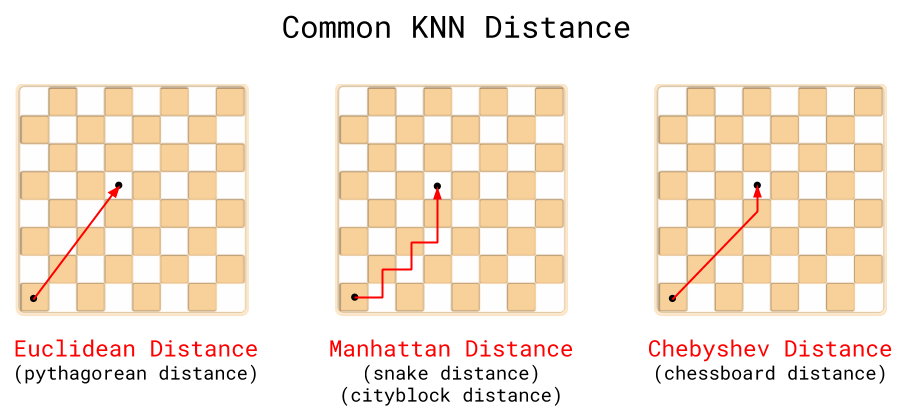

In [3]:
illustration.knn_distance

### Other Distance Metric

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split



from luwiji.knn import illustration

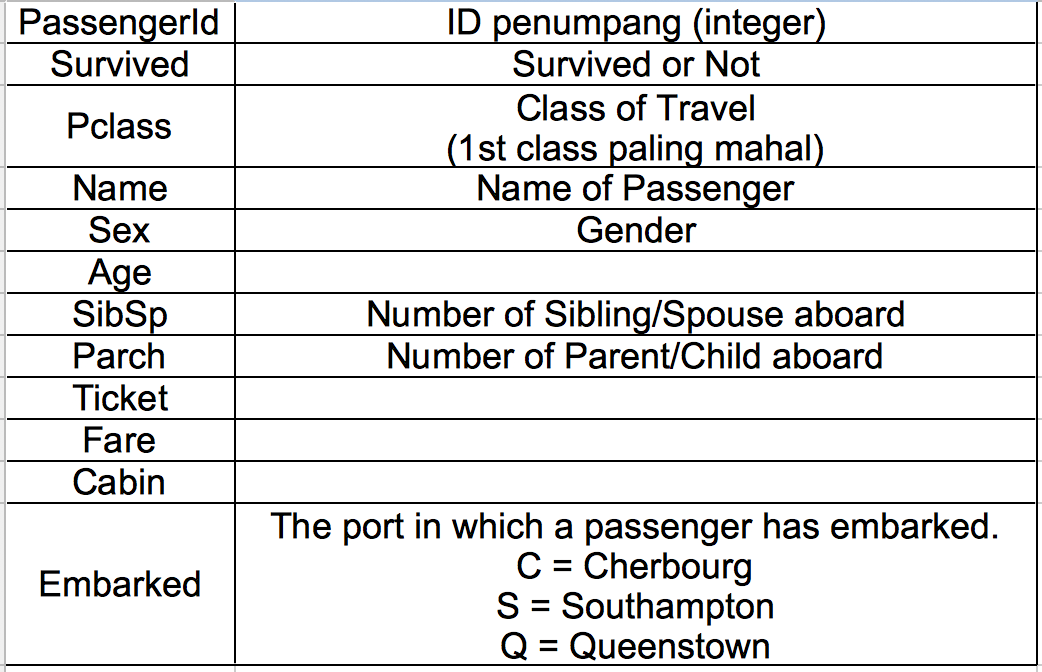

In [43]:
illustration.nomenklatur

In [3]:
df = pd.read_csv('data/titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df1 = df.copy()
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df1 = pd.get_dummies(df1, columns=['Sex'])
df1.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


<AxesSubplot:>

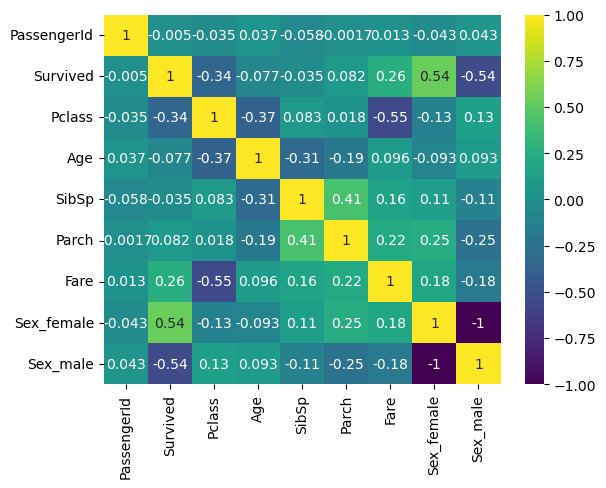

In [24]:
sns.heatmap(df1.corr(), annot=True, cmap='viridis')

In [28]:
df1['Age'].fillna(df1['Age'].mean(), inplace=True)
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_female       0
Sex_male         0
dtype: int64

In [32]:
df1.set_index('PassengerId', inplace=True)


KeyError: "None of ['PassengerId'] are in the columns"

In [33]:
df1.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [35]:
df1.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [46]:
df1.drop(columns=['Cabin'], inplace=True)

In [47]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,S,0,1
2,1,1,38.0,1,0,71.2833,C,1,0
3,1,3,26.0,0,0,7.9250,S,1,0
4,1,1,35.0,1,0,53.1000,S,1,0
5,0,3,35.0,0,0,8.0500,S,0,1


In [49]:
df1.Embarked.fillna('S', inplace=True)

In [50]:
df1.drop(columns=['Age'], inplace=True)

In [52]:
df1.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,
1,0,3,1,0,7.2500,S,0,1
2,1,1,1,0,71.2833,C,1,0
3,1,3,0,0,7.9250,S,1,0
4,1,1,1,0,53.1000,S,1,0
5,0,3,0,0,8.0500,S,0,1


<AxesSubplot:ylabel='PassengerId'>

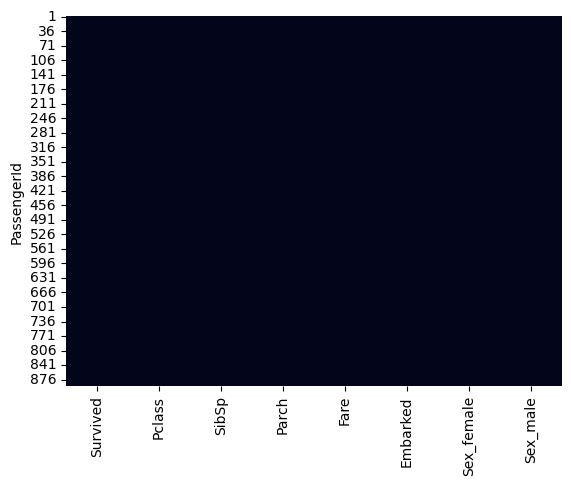

In [53]:
sns.heatmap(df1.isna(), cbar=False)

In [75]:
df1 = pd.get_dummies(df1, columns=['Pclass'])

In [76]:
df1.head()

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,
1,0,1,0,7.2500,0,1,0,0,1,0,0,1
2,1,1,0,71.2833,1,0,1,0,0,1,0,0
3,1,0,0,7.9250,1,0,0,0,1,0,0,1
4,1,1,0,53.1000,1,0,0,0,1,1,0,0
5,0,0,0,8.0500,0,1,0,0,1,0,0,1


<AxesSubplot:>

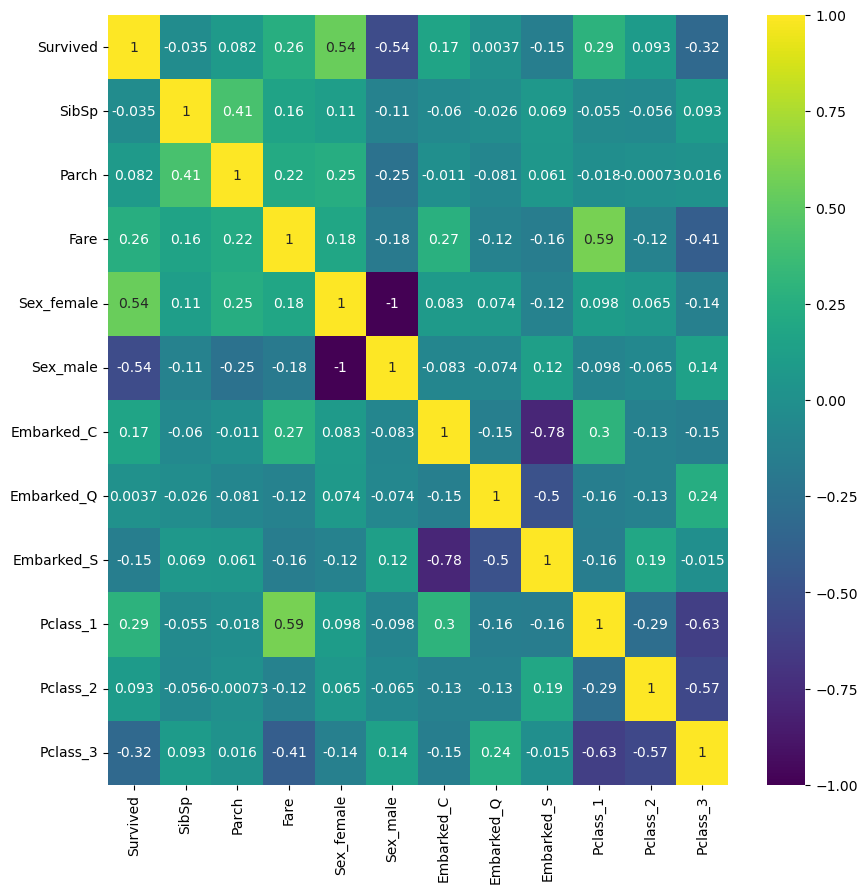

In [78]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df1.corr(), annot=True, cmap='viridis')

In [127]:
x = df1.drop(columns=['Survived'])
y = df1['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [128]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [129]:
y_pred = knn.predict(x_test)
res = knn.score(x_test, y_test) * 100
res

80.59701492537313

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

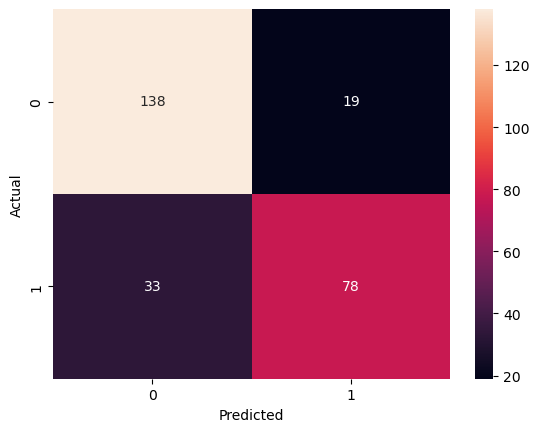

In [130]:
sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d')